# PyTorch Tutorial

#### Written by Jiajia Li

This is a PyTorch Tutorial for UC Berkeley's CS285.

First, let's import some things and define a useful plotting function

In [ ]:
#@title imports and define `plot`
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import torch
import numpy as np
import argparse
import os
import random

import torch
import torch.optim as optim
import torch.distributions as distributions
import torch.nn.functional as F
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

def plot(xs, ys, xlim=(-3, 3), ylim=(-3, 3)):
  fig, ax = plt.subplots()
  ax.plot(xs, ys, linewidth=5)
  # ax.set_aspect('equal')
  ax.grid(True, which='both')

  ax.axhline(y=0, color='k')
  ax.axvline(x=0, color='k')
  ax.set_xlim(*xlim)
  ax.set_ylim(*ylim)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


For GPU support, go to `Runtime > Change runtime type`.

# Review: Numpy

Numpy arrays are objects that allow you to store and manipulate matrices.

In [ ]:
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([[8, 0, 7], [3, 0, 1]])
z = np.random.rand(3, 2, 3)
print(f"x, shape={x.shape}:\n{x}\n")
print(f"y, shape={y.shape}:\n{y}\n")
print(f"z, shape={z.shape}:\n{z}\n")

x, shape=(6,):
[1 2 3 4 5 6]

y, shape=(2, 3):
[[8 0 7]
 [3 0 1]]

z, shape=(3, 2, 3):
[[[0.63309542 0.24329819 0.3331541 ]
  [0.87758101 0.96874004 0.54354554]]

 [[0.40392694 0.42119021 0.12467   ]
  [0.27372575 0.5853631  0.49787395]]

 [[0.28346096 0.5055866  0.77068958]
  [0.44575086 0.67526021 0.08984342]]]



You can index into Numpy arrays similar to Python lists (with integers or slices), with the addition of being able to specify indices for multiple dimensions.

In [ ]:
x = np.arange(1, 21, 1).reshape(4, 5)
print(x)
print()
# print(x[2]) # Single index
# print(x[2, 3]) # Indices for multiple dimensions
print(x[2:4, 3]) # Combining integer index and slice

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]]

[14 19]


## Numpy arithmetic and broadcasting

You can add/subtract/multiple/divide numpy arrays, as long as their dimensions match:

In [ ]:
a = np.ones((2, 3))
print(a)
print("+")
print(y)
print("=")
print(a + y)

[[1. 1. 1.]
 [1. 1. 1.]]
+
[[8 0 7]
 [3 0 1]]
=
[[9. 1. 8.]
 [4. 1. 2.]]


You can also sometimes do arithmetic operations on arrays whose dimensions _don't_ match exactly. Whenever possible, values will be "copied" so that the dimensions match:

In [ ]:
print(f"3\n*\n{a}\n=\n{3*a}\n")

a = np.array([1, 2, 3])
print(f"{a}\n+\n{z}\n=\n{a+z}")

3
*
[[1. 1. 1.]
 [1. 1. 1.]]
=
[[3. 3. 3.]
 [3. 3. 3.]]

[1 2 3]
+
[[[0.81483387 0.66772522 0.88814128]
  [0.65155229 0.58980819 0.24619061]]

 [[0.45136935 0.06603099 0.0267932 ]
  [0.69967916 0.32541243 0.61272542]]

 [[0.46221636 0.2061976  0.43870403]
  [0.74994459 0.8465322  0.56490861]]]
=
[[[1.81483387 2.66772522 3.88814128]
  [1.65155229 2.58980819 3.24619061]]

 [[1.45136935 2.06603099 3.0267932 ]
  [1.69967916 2.32541243 3.61272542]]

 [[1.46221636 2.2061976  3.43870403]
  [1.74994459 2.8465322  3.56490861]]]


This is called [broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html), and it has many benefits:
- More concise code
- Duplicated values aren't explicitly created/stored in memory
- Repeated operations are optimized to run faster

## Axes

Numpy arrays have **axes**, which are like the "directions" along which you can do things. For example, in 2D:

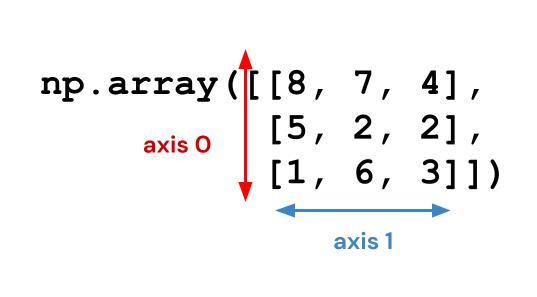

In [ ]:
x = np.array([[8, 7, 4], [5, 2, 2], [1, 6, 3]])
# print(np.sum(x))
# print(np.sum(x, axis=0))
# print(np.sum(x, axis=1))
print()
print(np.max(x))
print(np.max(x, axis=0))
print(np.max(x, axis=1))


8
[8 7 4]
[8 5 6]


More generally, you can think of an axis as the index of one of the values in the array's `shape`. If you do a reduction operation (e.g. sum, max) on a certain axis, that axis will disappear from the array's shape:

In [ ]:
z = np.random.randint(10, size=(3, 2, 4, 5))
print(np.sum(z, axis=2).shape)
print(np.sum(z, axis=(0, 2)).shape)

(3, 2, 5)
(2, 5)


## Shapes and reshaping

Be careful about the shape of your numpy arrays, especially when you're working with vectors (where one of the dimensions is 1)!

In [ ]:
# These two are different things!
x = np.random.randint(10, size=(10,))
y = np.random.randint(10, size=(10, 1))
print(x)
print(y)

[5 8 7 7 2 8 2 6 1 9]
[[8]
 [0]
 [8]
 [7]
 [5]
 [4]
 [1]
 [2]
 [7]
 [0]]


In [ ]:
# If you multiply a shape (n,) array with a (n,1) array, you actually get a shape (n,n) matrix:
print(x)
print("*")
print(y)
print("=")
print(x * y)

[1 0 6 9 9 4 6 0 9 6]
*
[[8]
 [1]
 [5]
 [1]
 [5]
 [2]
 [8]
 [5]
 [0]
 [1]]
=
[[ 8  0 48 72 72 32 48  0 72 48]
 [ 1  0  6  9  9  4  6  0  9  6]
 [ 5  0 30 45 45 20 30  0 45 30]
 [ 1  0  6  9  9  4  6  0  9  6]
 [ 5  0 30 45 45 20 30  0 45 30]
 [ 2  0 12 18 18  8 12  0 18 12]
 [ 8  0 48 72 72 32 48  0 72 48]
 [ 5  0 30 45 45 20 30  0 45 30]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 1  0  6  9  9  4  6  0  9  6]]


In [ ]:
# If your intention is to multiply the two vectors element-wise, you need to reshape one of them first!
x_reshaped = x.reshape(-1, 1) # -1 means "infer this dimension"
print()
print(x_reshaped)
print("*")
print(y)
print("=")
print(x_reshaped * y)


[[1]
 [0]
 [6]
 [9]
 [9]
 [4]
 [6]
 [0]
 [9]
 [6]]
*
[[8]
 [1]
 [5]
 [1]
 [5]
 [2]
 [8]
 [5]
 [0]
 [1]]
=
[[ 8]
 [ 0]
 [30]
 [ 9]
 [45]
 [ 8]
 [48]
 [ 0]
 [ 0]
 [ 6]]


It's pretty common to have to add/remove an axis from a numpy array, so there's some useful syntax to do this:

In [ ]:
# Removing axis/axes from an array
print(y.shape)
print(y.reshape(10).shape)
print(y.squeeze().shape)

(10, 1)
(10,)
(10,)


In [ ]:
# Adding axis/axes to an array
print(x.shape)
# print(x.reshape(-1, 1).shape)
print(x[:, np.newaxis].shape)
print(x[:, None].shape) # Same as above, but not as readable

(10,)
(10, 1)
(10, 1)


The benefits of `squeeze` and `np.newaxis` become clearer when you're working with more dimensions:

In [ ]:
a = np.random.randint(10, size=(10, 1, 4, 1, 1, 6, 2))
print(a.shape)
print(a.reshape(10, 4, 1, 6, 2).shape)
print(a.squeeze((1, 3)).shape)

(10, 1, 4, 1, 1, 6, 2)
(10, 4, 1, 6, 2)
(10, 4, 1, 6, 2)


In [ ]:
b = np.random.randint(10, size=(10, 4, 2, 7, 8, 9))
print(b.shape)
print(b.reshape(10, 1, 4, 1, 2, 7, 8, 9).shape)
print(b[:, np.newaxis, :, np.newaxis, ...].shape) # ... means "rest of dimensions"

(10, 4, 2, 7, 8, 9)
(10, 1, 4, 1, 2, 7, 8, 9)
(10, 1, 4, 1, 2, 7, 8, 9)


## Array Multiplication

Numpy has two multiplication operators: `*` and `@`.
- `*` does **element-wise** multiplication.
- `@` does **matrix** multiplication.

In [ ]:
matrix = np.random.randint(10, size=(5, 5))
row_vec = np.random.randint(10, size=(5,))
col_vec = row_vec.reshape(5, 1)

# Outer product
print(col_vec)
print("*")
print(row_vec)
print("=")
print(col_vec * row_vec)

[[5]
 [8]
 [9]
 [4]
 [4]]
*
[5 8 9 4 4]
=
[[25 40 45 20 20]
 [40 64 72 32 32]
 [45 72 81 36 36]
 [20 32 36 16 16]
 [20 32 36 16 16]]


In [ ]:
# Dot product
print(row_vec)
print("@")
print(col_vec)
print("=")
# print(row_vec @ col_vec) # Result will be a shape (1,) array
# print(row_vec.dot(col_vec).squeeze()) # Same as above
print(row_vec @ col_vec.squeeze()) # Works on arrays with same shape too (to get scalar)

[5 8 9 4 4]
@
[[5]
 [8]
 [9]
 [4]
 [4]]
=
202


Below are some other common Numpy operations you'll probably find useful at some point in this class:

In [ ]:
# transpose: reorders the axes of the array
z = np.random.rand(28, 28, 3)
z_transposed = z.transpose((2, 0, 1))
print("Orig shape:", z.shape)
print("New shape: ", z_transposed.shape)


Orig shape: (28, 28, 3)
New shape:  (3, 28, 28)


# PyTorch Basics

PyTorch is built around _tensors_, which are very similar to numpy arrays. You can do many of the same operations in PyTorch; everything we covered above applies to PyTorch tensors as well!

In [ ]:
x = torch.zeros(2, 3)
y = torch.ones(2, 3)
z = x + y

print(x)
print("+")
print(y)
print("=")
print(z)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
+
tensor([[1., 1., 1.],
        [1., 1., 1.]])
=
tensor([[1., 1., 1.],
        [1., 1., 1.]])


Reduction operations work the same way as they do in Numpy, except we use the argument `dim` instead of `axis`:

In [ ]:
print(torch.sum(z, dim=1))
print(torch.sum(z, dim=0))

tensor([3., 3.])
tensor([2., 2., 2.])


Also like Numpy, PyTorch will try to broadcast operations:

In [ ]:
x = torch.ones((3, 1))
y = torch.ones((1, 3))
z = x + y

print(x)
print("+")
print(y)
print("=")
print(z)

tensor([[1.],
        [1.],
        [1.]])
+
tensor([[1., 1., 1.]])
=
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])


### Moving between numpy and PyTorch

In [ ]:
x_np = np.random.randn(2, 3)
print(x_np)

[[ 0.349991    1.83851896  0.39540511]
 [ 0.18517813 -0.31658438  0.60447255]]


Use `torch.from_numpy` to convert from numpy array -> PyTorch tensor. The resulting tensor shares the same memory as the numpy array:

In [ ]:
x = torch.from_numpy(x_np)
print(x)

x_np[:] = 0
print(x)

tensor([[ 0.3500,  1.8385,  0.3954],
        [ 0.1852, -0.3166,  0.6045]], dtype=torch.float64)
tensor([[0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)


By default, numpy arrays are float64. You'll probably want to convert arrays to float32, as most tensors in pytorch are float32.

In [ ]:
x = torch.from_numpy(x_np).to(torch.float32)
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


Use `.numpy()` to convert from PyTorch tensor -> numpy array:

In [ ]:
print(x.numpy())

[[0. 0. 0.]
 [0. 0. 0.]]


## Neural-Network specific functions
PyTorch has a bunch of built-in funcitons.
See [the docs](https://pytorch.org/docs/stable/torch.html) for a full list.

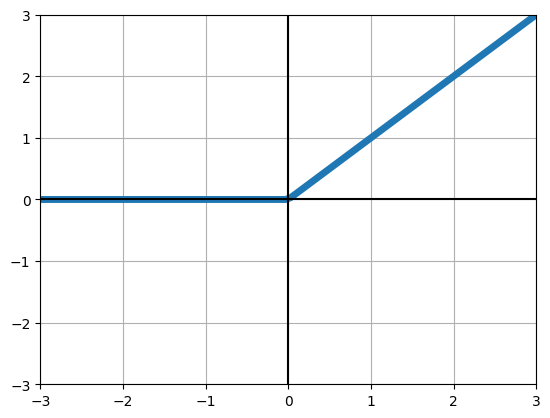

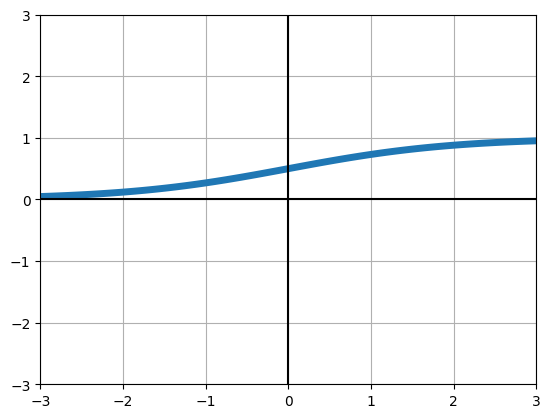

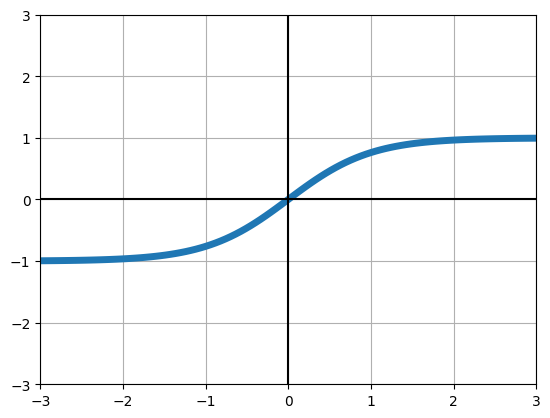

In [ ]:
# Activation functions
xs = torch.linspace(-3, 3, 100)
ys = torch.relu(xs)
plot(xs.numpy(), ys.numpy())
ys = torch.sigmoid(xs)
plot(xs.numpy(), ys.numpy())
ys = torch.tanh(xs)
plot(xs.numpy(), ys.numpy())

In [ ]:
x = torch.tensor([[2, 3.5],
                  [4, 4]])
torch.softmax(x, dim=-1) # Do softmax along last dimension (by row)

tensor([[0.1824, 0.8176],
        [0.5000, 0.5000]])

## Automatic differentiation

Given some loss function
$$L(\vec x, \vec y) = ||2 \vec x + \vec y||_2^2$$
we want to evaluate
$$\frac{\partial L}{\partial \vec x}$$
and
$$\frac{\partial L}{\partial \vec y}$$

In [ ]:
# By default, tensors have requires_grad=False. Need to specify if you want
# the gradients for a tensor!
shape = (3, )
x = torch.tensor([1., 2, 3], requires_grad=True)
y = torch.ones(shape, requires_grad=True)

PyTorch makes this easy by having tensors keep track of their data...

In [ ]:
x.data

tensor([1., 2., 3.])

...and their gradient:

In [ ]:
print(x.grad)

None


However, right now `x` has no gradient because it does not know what loss it must be differentiated with respect to.
Below, we define the loss.

In [ ]:
loss = ((2 * x + y)**2).sum()
print(loss)

tensor(83., grad_fn=<SumBackward0>)


Notice the `grad_fn` property on the tensor. We can trace our way back through these grad functions to see the whole computation graph:

In [ ]:
grad_fns = [(loss.grad_fn, 0)]
curr_level = 0
lines = []
while grad_fns:
    prev_level = curr_level
    fn, curr_level = grad_fns.pop()
    if curr_level != prev_level:
        print("---")
    print(fn.name())
    for next_fn, _ in fn.next_functions:
        if next_fn:
            grad_fns.append((next_fn, curr_level + 1))

SumBackward0
---
PowBackward0
---
AddBackward0
---
torch::autograd::AccumulateGrad
MulBackward0
---
torch::autograd::AccumulateGrad


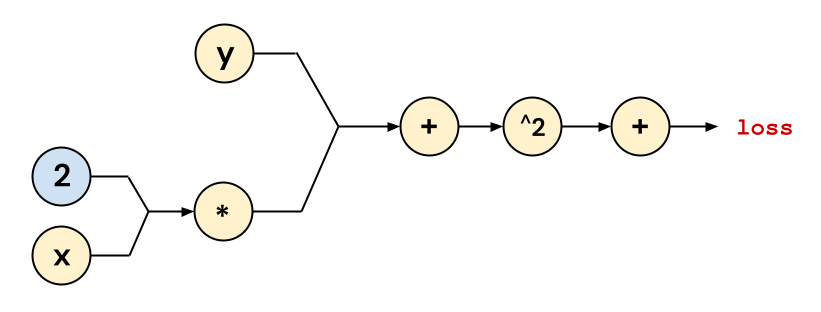

Each of the yellow nodes above has a `.grad` property which will store the gradients accumulated during backprop.

To perform backprop, call `.backward()` on the loss:

In [ ]:
loss.backward()

Now we see that the gradients are populated!

In [ ]:
print(x.grad)
print(y.grad)

tensor([12., 20., 28.])
tensor([ 6., 10., 14.])


### gradients accumulate
Gradients accumulate, so if you call backwards twice...

In [ ]:
loss = ((2 * x + y)**2).sum()
loss.backward()

...you'll get twice the gradient.

In [ ]:
print(x.grad)
print(y.grad)

tensor([24., 40., 56.])
tensor([12., 20., 28.])


### multiple losses

This accumulation makes it easy to add gradients from different losses, which might not even use the same parameters. For example, this loss is only a function of `x`....

In [ ]:
other_loss = (x**2).sum()
other_loss.backward()

...and so only `x.grad` changes.

In [ ]:
print(x.grad)
print(y.grad)

tensor([26., 44., 62.])
tensor([12., 20., 28.])


### stopping and starting gradients

If you don't specify `required_grad=True`, the gradient will always be `None`.

In [ ]:
shape = (3, )
x = torch.tensor([1., 2, 3], requires_grad=True)
y = torch.ones(shape)
loss = ((2 * x + y)**2).sum()
loss.backward()
print(x.grad)
print(y.grad)

tensor([12., 20., 28.])
None


You can turn `required_grad` back on after initializing a tensor.

In [ ]:
shape = (3, )
x = torch.tensor([1., 2, 3], requires_grad=True)
y = torch.ones(shape)
y.requires_grad = True
loss = ((2 * x + y)**2).sum()
loss.backward()
print(x.grad)
print(y.grad)

tensor([12., 20., 28.])
tensor([ 6., 10., 14.])


You can cut a gradient by calling `y.detach()`, which will return a new tensor with `required_grad=False`. Note that `detach` is not an in-place operation!

In [ ]:
shape = (3, )
x = torch.tensor([1., 2, 3], requires_grad=True)
y = torch.ones(shape, requires_grad=True)
y_detached = y.detach()
loss = ((2 * x + y)**2).sum()
loss.backward()
print(x.grad)
print(y.grad)
print(y_detached.grad)
print(y.detach())

tensor([12., 20., 28.])
tensor([ 6., 10., 14.])
None
tensor([1., 1., 1.])


A few things to watch out for:
- You can't do any in-place operations on a tensor that has `requires_grad=True`. (This prevents you from inadvertently mutating it in a way that isn't tracked for backprop purposes.)

- You also can't convert a tensor with `requires_grad=True` to numpy (for the same reason as above). Instead, you need to detach it first, e.g. `y.detach().numpy()`.

- Even though `y.detach()` returns a new tensor, that tensor occupies the same memory as `y`. Unfortunately, PyTorch lets you make changes to `y.detach()` or `y.detach.numpy()` which will affect `y` as well! If you want to safely mutate the detached version, you should use `y.detach().clone()` instead, which will create a tensor in new memory.

## GPU support

Most of the time, you'll want to do your training on a GPU so that it runs much faster.

PyTorch makes it easy to move tensors between CPU <-> GPU for training...

In [ ]:
# Checking whether GPU is available
print(torch.cuda.is_available())

# Initialize a tensor on GPU instead of CPU
device = torch.device("cuda")
y = torch.ones((2, 3), device=device)
print(y)

You can only do operations on tensors if they're on the same device. The code below errors because one tensor is on CPU while the other is on GPU:

In [ ]:
device = torch.device("cuda")
x = torch.zeros((2, 3))
y = torch.ones((2, 3), device=device)
z = x + y

You can move a tensor to the GPU by using the `to` function.

In [ ]:
x = x.to(device)
z = x + y
print(z)

You can't convert tensors on a GPU into numpy arrays directly. This will error:

In [ ]:
z.numpy()

Instead, you will need to first move the tensor to CPU before converting to numpy.

In [ ]:
z_cpu = z.to('cpu')
z_cpu.numpy()

# DCGAN Example
What is GAN?
GANs are a framework for teaching a deep learning model to capture the training data distribution so we can generate new data from that same distribution. They are made of two distinct models, a generator and a discriminator. The job of the generator is to spawn ‘fake’ images that look like the training images. The job of the discriminator is to look at an image and output whether or not it is a real training image or a fake image from the generator.

reference: https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html

In [ ]:


# Set random seed for reproducibility
manualSeed = 999
#manualSeed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)
torch.use_deterministic_algorithms(True) # Needed for reproducible results

Random Seed:  999


## Data

In [ ]:
# Root directory for dataset
from google.colab import drive
dataroot = "/content/celeba/"

# Number of workers for dataloader
workers = 2

# Batch size during training
batch_size = 128

# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 64

# Number of channels in the training images. For color images this is 3
nc = 3

# Size of z latent vector (i.e. size of generator input)
nz = 100

# Size of feature maps in generator
ngf = 64

# Size of feature maps in discriminator
ndf = 64

# Number of training epochs
num_epochs = 5

# Learning rate for optimizers
lr = 0.0002

# Beta1 hyperparameter for Adam optimizers
beta1 = 0.5

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1

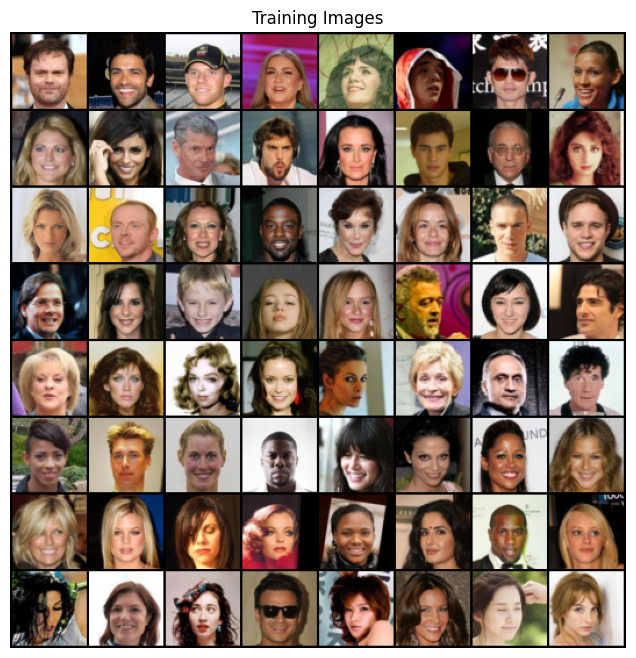

In [ ]:
# We can use an image folder dataset the way we have it setup.
# Create the dataset
dataset = dset.ImageFolder(root=dataroot,
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))
# Create the dataloader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         shuffle=True, num_workers=workers)

# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

# Plot some training images
real_batch = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

Weight Initialization

In [ ]:
# custom weights initialization called on ``netG`` and ``netD``
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

## Generator Code


In [ ]:
# Generator Code

class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d( nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. ``(ngf*8) x 4 x 4``
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. ``(ngf*4) x 8 x 8``
            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. ``(ngf*2) x 16 x 16``
            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. ``(ngf) x 32 x 32``
            nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. ``(nc) x 64 x 64``
        )

    def forward(self, input):
        return self.main(input)

Now, we can instantiate the generator and apply the weights_init function. Check out the printed model to see how the generator object is structured.



In [ ]:
# Create the generator
netG = Generator(ngpu).to(device)

# Handle multi-GPU if desired
if (device.type == 'cuda') and (ngpu > 1):
    netG = nn.DataParallel(netG, list(range(ngpu)))

# Apply the ``weights_init`` function to randomly initialize all weights
#  to ``mean=0``, ``stdev=0.02``.
netG.apply(weights_init)

# Print the model
print(netG)

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)


## Discriminator Code


In [ ]:
class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is ``(nc) x 64 x 64``
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf) x 32 x 32``
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf*2) x 16 x 16``
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf*4) x 8 x 8``
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf*8) x 4 x 4``
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

In [ ]:
# Create the Discriminator
netD = Discriminator(ngpu).to(device)

# Handle multi-GPU if desired
if (device.type == 'cuda') and (ngpu > 1):
    netD = nn.DataParallel(netD, list(range(ngpu)))

# Apply the ``weights_init`` function to randomly initialize all weights
# like this: ``to mean=0, stdev=0.2``.
netD.apply(weights_init)

# Print the model
print(netD)

Discriminator(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)


## Loss Function and Optimizer

In [ ]:
# Initialize the ``BCELoss`` function
criterion = nn.BCELoss()

# Create batch of latent vectors that we will use to visualize
#  the progression of the generator
fixed_noise = torch.randn(64, nz, 1, 1, device=device)

# Establish convention for real and fake labels during training
real_label = 1.
fake_label = 0.

# Setup Adam optimizers for both G and D
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

## Training

In [ ]:
# Training Loop

# Lists to keep track of progress
img_list = []
G_losses = []
D_losses = []
iters = 0

print("Starting Training Loop...")
# For each epoch
for epoch in range(num_epochs):
    # For each batch in the dataloader
    for i, data in enumerate(dataloader, 0):

        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        ## Train with all-real batch
        netD.zero_grad()
        # Format batch
        real_cpu = data[0].to(device)
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)
        # Forward pass real batch through D
        output = netD(real_cpu).view(-1)
        # Calculate loss on all-real batch
        errD_real = criterion(output, label)
        # Calculate gradients for D in backward pass
        errD_real.backward()
        D_x = output.mean().item()

        ## Train with all-fake batch
        # Generate batch of latent vectors
        noise = torch.randn(b_size, nz, 1, 1, device=device)
        # Generate fake image batch with G
        fake = netG(noise)
        label.fill_(fake_label)
        # Classify all fake batch with D
        output = netD(fake.detach()).view(-1)
        # Calculate D's loss on the all-fake batch
        errD_fake = criterion(output, label)
        # Calculate the gradients for this batch, accumulated (summed) with previous gradients
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        # Compute error of D as sum over the fake and the real batches
        errD = errD_real + errD_fake
        # Update D
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        label.fill_(real_label)  # fake labels are real for generator cost
        # Since we just updated D, perform another forward pass of all-fake batch through D
        output = netD(fake).view(-1)
        # Calculate G's loss based on this output
        errG = criterion(output, label)
        # Calculate gradients for G
        errG.backward()
        D_G_z2 = output.mean().item()
        # Update G
        optimizerG.step()

        # Output training stats
        if i % 50 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(dataloader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

        # Save Losses for plotting later
        G_losses.append(errG.item())
        D_losses.append(errD.item())

        # Check how the generator is doing by saving G's output on fixed_noise
        if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(dataloader)-1)):
            with torch.no_grad():
                fake = netG(fixed_noise).detach().cpu()
            img_list.append(vutils.make_grid(fake, padding=2, normalize=True))

        iters += 1

Starting Training Loop...
[0/5][0/1]	Loss_D: 0.1911	Loss_G: 7.0521	D(x): 0.9475	D(G(z)): 0.1172 / 0.0013
[1/5][0/1]	Loss_D: 0.2088	Loss_G: 7.5048	D(x): 0.9495	D(G(z)): 0.1304 / 0.0010
[2/5][0/1]	Loss_D: 0.2720	Loss_G: 8.4641	D(x): 0.9475	D(G(z)): 0.1778 / 0.0003
[3/5][0/1]	Loss_D: 0.1370	Loss_G: 7.5453	D(x): 0.9271	D(G(z)): 0.0524 / 0.0009


KeyboardInterrupt: ignored

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()